In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

----------

In [5]:
df = pd.read_parquet('../data/steam_games.parquet')

Se utiliza la función `pd.read_parquet()` de Pandas para cargar información desde el archivo Parquet `'data/steam_games.parquet'`. El DataFrame resultante se asigna a la variable `df`, lo que facilita el análisis y manipulación posterior de los datos.

------------------

In [6]:
df.columns

Index(['titulo', 'especificacion', 'precio', 'acceso_anticipado',
       'sentimiento', 'metascore', 'año', 'genero'],
      dtype='object')

Muestra una lista de las columnas contenidas en el conjunto de datos.

-------------

In [7]:
df.dtypes

titulo                object
especificacion        object
precio               float64
acceso_anticipado      int32
sentimiento           object
metascore             object
año                   object
genero                object
dtype: object

Muestra los tipos de datos de cada columna en el conjunto de datos.

------------

In [8]:
df.info

<bound method DataFrame.info of                       titulo      especificacion  precio  acceso_anticipado  \
0        lost summoner kitty       single player    4.99                  0   
1        lost summoner kitty       single player    4.99                  0   
2        lost summoner kitty       single player    4.99                  0   
3        lost summoner kitty       single player    4.99                  0   
4        lost summoner kitty       single player    4.99                  0   
...                      ...                 ...     ...                ...   
3991345  exit 2   directions  steam achievements    4.99                  0   
3991346  exit 2   directions         steam cloud    4.99                  0   
3991347  exit 2   directions       single player    4.99                  0   
3991348  exit 2   directions  steam achievements    4.99                  0   
3991349  exit 2   directions         steam cloud    4.99                  0   

        sentimiento

Muestra el contenido completo del DataFrame `df`. Los datos se presentan en forma tabular, donde cada fila representa una entrada individual y cada columna corresponde a una característica específica de los datos. En este caso, el DataFrame contiene 3,991,350 filas y 8 columnas con diferentes atributos relacionados con los juegos de Steam.

--------------------

Porcentaje de títulos sin precio y con precio

In [9]:
# Calcula el porcentaje de títulos sin precio y con precio
sin_precio = df['precio'].isnull().sum()
con_precio = len(df) - sin_precio
porcentaje_sin_precio = (sin_precio / len(df)) * 100
porcentaje_con_precio = 100 - porcentaje_sin_precio

print(f"Porcentaje de títulos sin precio: {porcentaje_sin_precio:.2f}%")
print(f"Porcentaje de títulos con precio: {porcentaje_con_precio:.2f}%")


Porcentaje de títulos sin precio: 2.85%
Porcentaje de títulos con precio: 97.15%


Se calculó el porcentaje de títulos con y sin precio en el conjunto de datos. La mayoría de los títulos (97.15%) tienen un precio asignado, mientras que un pequeño porcentaje (2.85%) carece de precio. Esto podría indicar que la mayoría de los juegos en la plataforma Steam son comerciales y requieren un precio para acceder.

---------

In [10]:
# Definir paleta de colores
colors = ['#267365', '#F2CB05', '#F29F05', '#F28705', '#F23030']

Se define una paleta de colores personalizada utilizando una lista de códigos hexadecimales de color.

--------------

Relación entre el precio y el resto de las variables

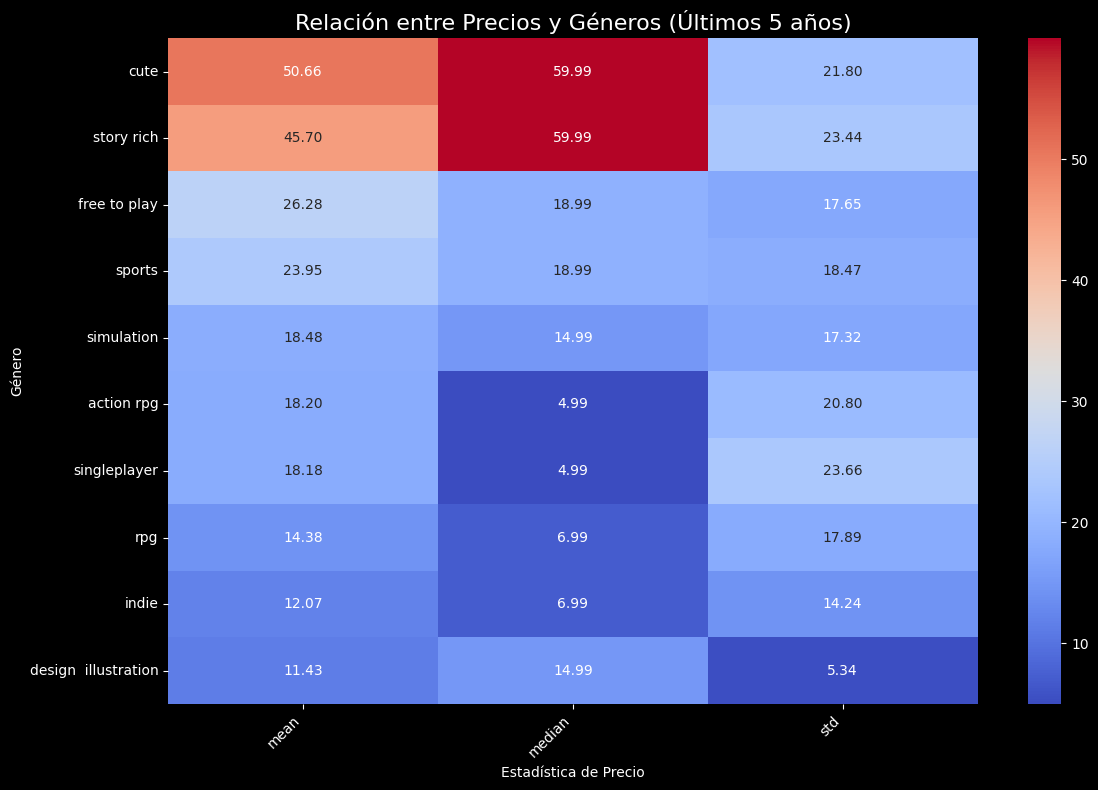

In [11]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para incluir solo los últimos 5 años y eliminar filas con precio nulo o 0
ultimos_5_anios = df[(df['año'].astype(int) >= 2018) & (df['precio'].notnull()) & (df['precio'] > 0)]

# Calcular estadísticas de precios por género
estadisticas_precio_por_genero = ultimos_5_anios.groupby('genero')['precio'].agg(['mean', 'median', 'std'])

# Excluir filas donde la desviación estándar es igual a 0
estadisticas_precio_por_genero = estadisticas_precio_por_genero[estadisticas_precio_por_genero['std'] > 0]

# Seleccionar los 10 géneros con el promedio más alto
top_generos_estadisticas = estadisticas_precio_por_genero.sort_values(by='mean', ascending=False).head(10)

# Configurar el estilo del gráfico
plt.style.use('dark_background')  # Fondo negro
plt.figure(figsize=(12, 8))

# Crear un mapa de calor para mostrar las relaciones entre géneros y estadísticas de precios
sns.heatmap(top_generos_estadisticas[['mean', 'median', 'std']], cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Relación entre Precios y Géneros (Últimos 5 años)', fontsize=16)
plt.xlabel('Estadística de Precio')
plt.ylabel('Género')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Géneros con Precios Destacados:** Géneros como `"cute"`, `"story rich"` y `"free to play"` tienen precios promedio más altos, indicando que estos géneros pueden ser más costosos en promedio.

**Variabilidad de Precios**: Algunos géneros tienen precios constantes, mientras que otros, como `"cute"` y `"story rich"`, tienen variabilidad en sus precios, lo que sugiere una gama más amplia de opciones de precios en estos géneros.

**Relación entre Precios y Géneros**: El mapa de calor resalta cómo varían las estadísticas de precios en diferentes géneros. Algunos géneros tienen precios consistentes, mientras que otros varían más.

**Géneros Populares**: Géneros como `"action rpg"`, `"singleplayer"`, `"rpg"`, `"indie"` y `"design  illustration"` son populares y tienen rangos de precios diversos.

--------------

<Figure size 1200x800 with 0 Axes>

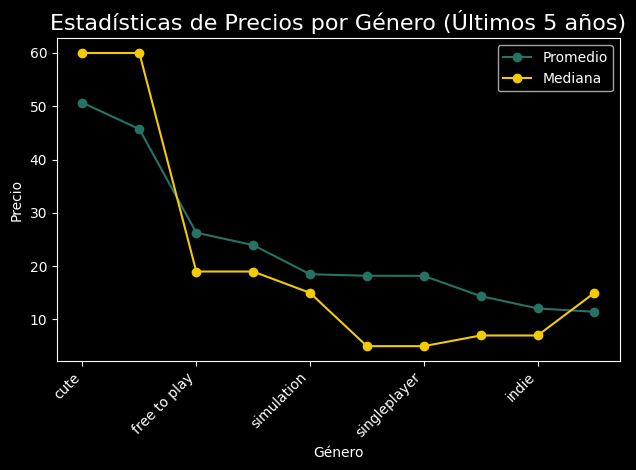

Estadísticas de Precios por Género (Últimos 5 años):

                           mean  median        std
genero                                            
cute                  50.656667   59.99  21.797970
story rich            45.704286   59.99  23.440362
free to play          26.276957   18.99  17.651067
sports                23.950000   18.99  18.465979
simulation            18.482987   14.99  17.319285
action rpg            18.197547    4.99  20.803438
singleplayer          18.180476    4.99  23.657349
rpg                   14.380566    6.99  17.888341
indie                 12.073016    6.99  14.238461
design  illustration  11.434444   14.99   5.341140


In [15]:
# Filtra los datos para incluir solo los últimos 5 años y eliminar filas con precio nulo o 0
ultimos_5_anios = df[(df['año'].astype(int) >= 2018) & (df['precio'].notnull()) & (df['precio'] > 0)]

# Calcula las estadísticas de precios por género
estadisticas_precio_por_genero = ultimos_5_anios.groupby('genero')['precio'].agg(['mean', 'median', 'std'])

# Excluye las filas donde la desviación estándar es igual a 0
estadisticas_precio_por_genero = estadisticas_precio_por_genero[estadisticas_precio_por_genero['std'] > 0]

# Selecciona los 10 géneros con el promedio más alto
top_generos_estadisticas = estadisticas_precio_por_genero.sort_values(by='mean', ascending=False).head(10)

# Configura el estilo del gráfico
plt.style.use('dark_background')  # Fondo negro
plt.figure(figsize=(12, 8))

# Crea un gráfico de líneas para mostrar el promedio, la mediana y la media de precios por género
top_generos_estadisticas[['mean', 'median']].plot(kind='line', marker='o', color=colors)
plt.title('Estadísticas de Precios por Género (Últimos 5 años)', fontsize=16)
plt.xlabel('Género')
plt.ylabel('Precio')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.legend(['Promedio', 'Mediana'])
plt.tight_layout()
plt.show()

# Muestra las mismas estadísticas en forma de tabla
print("Estadísticas de Precios por Género (Últimos 5 años):\n")
print(top_generos_estadisticas)

En base a las estadísticas de precios por género en los últimos 5 años, se observa que los géneros `"cute"` y `"story rich"` presentan los mayores promedios de precios, con valores de `$50.66` y `$45.70` respectivamente, mientras que el género `"design illustration"` tiene el menor promedio con `$11.43`. Además, los géneros `"cute"`, `"story rich"` y `"free to play"` muestran desviaciones estándar relativamente altas, indicando una mayor variabilidad en los precios dentro de estos géneros. Estos resultados sugieren una diversidad en los precios de los juegos según el género, con algunos géneros teniendo una mayor dispersión en sus precios promedio.

------------------

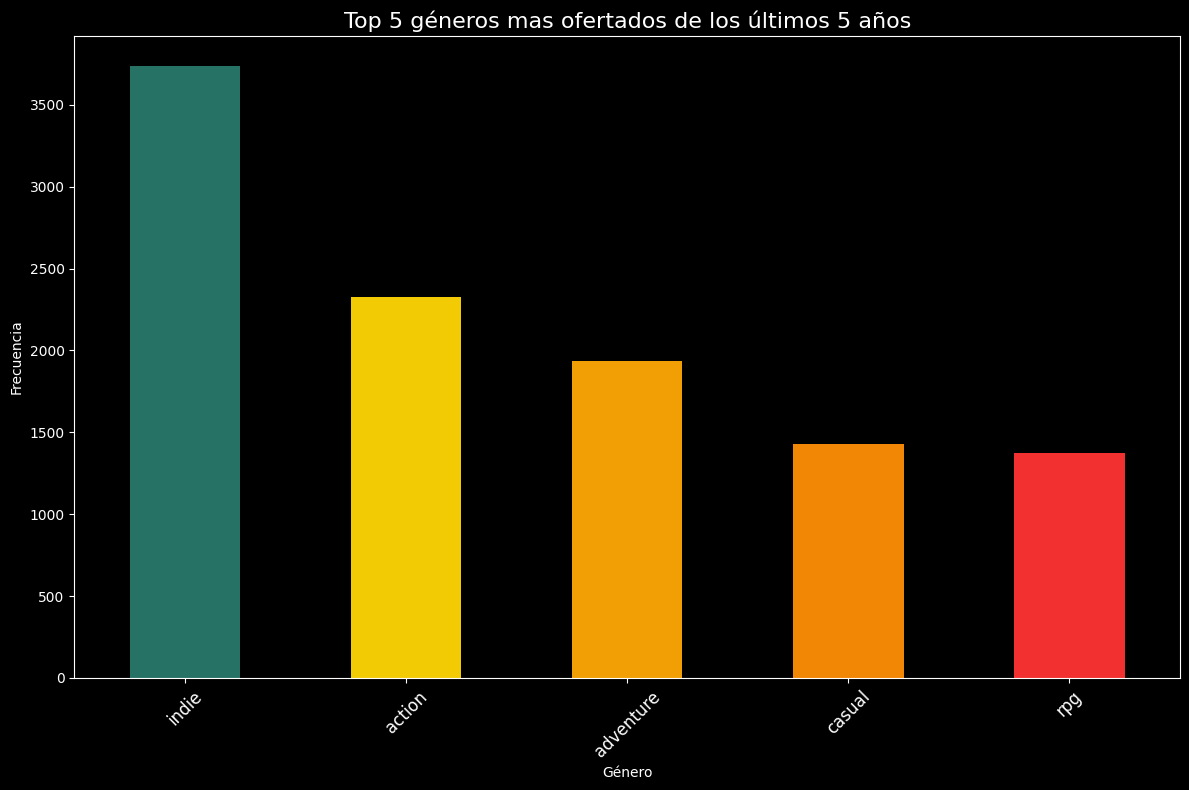

Top 5 géneros más ofertados de los últimos 5 años:

genero
indie        3735
action       2329
adventure    1934
casual       1429
rpg          1376
Name: count, dtype: int64


In [19]:
# Establece el estilo de fondo negro
plt.style.use('dark_background')

# Crea una figura con un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Filtra los datos para incluir solo los últimos 5 años
ultimos_5_anios = df[df['año'].astype(int) >= 2018]

# Cuenta la frecuencia de géneros
frecuencia_generos = ultimos_5_anios['genero'].value_counts()

# Selecciona los 5 géneros más repetidos
top_5_generos = frecuencia_generos.head(5)

# Crea un gráfico de barras utilizando la paleta de colores personalizada
top_5_generos.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Top 5 géneros mas ofertados de los últimos 5 años', fontsize=16)
ax.set_xlabel('Género')
ax.set_ylabel('Frecuencia')
ax.tick_params(axis='x', rotation=45, labelsize=12)
plt.tight_layout()
plt.show()

# Filtra los datos para incluir solo los últimos 5 años
ultimos_5_anios = df[df['año'].astype(int) >= 2018]

# Cuenta la frecuencia de géneros
frecuencia_generos = ultimos_5_anios['genero'].value_counts()

# Selecciona los 5 géneros más repetidos
top_5_generos = frecuencia_generos.head(5)

print("Top 5 géneros más ofertados de los últimos 5 años:\n")
print(top_5_generos)

-------------

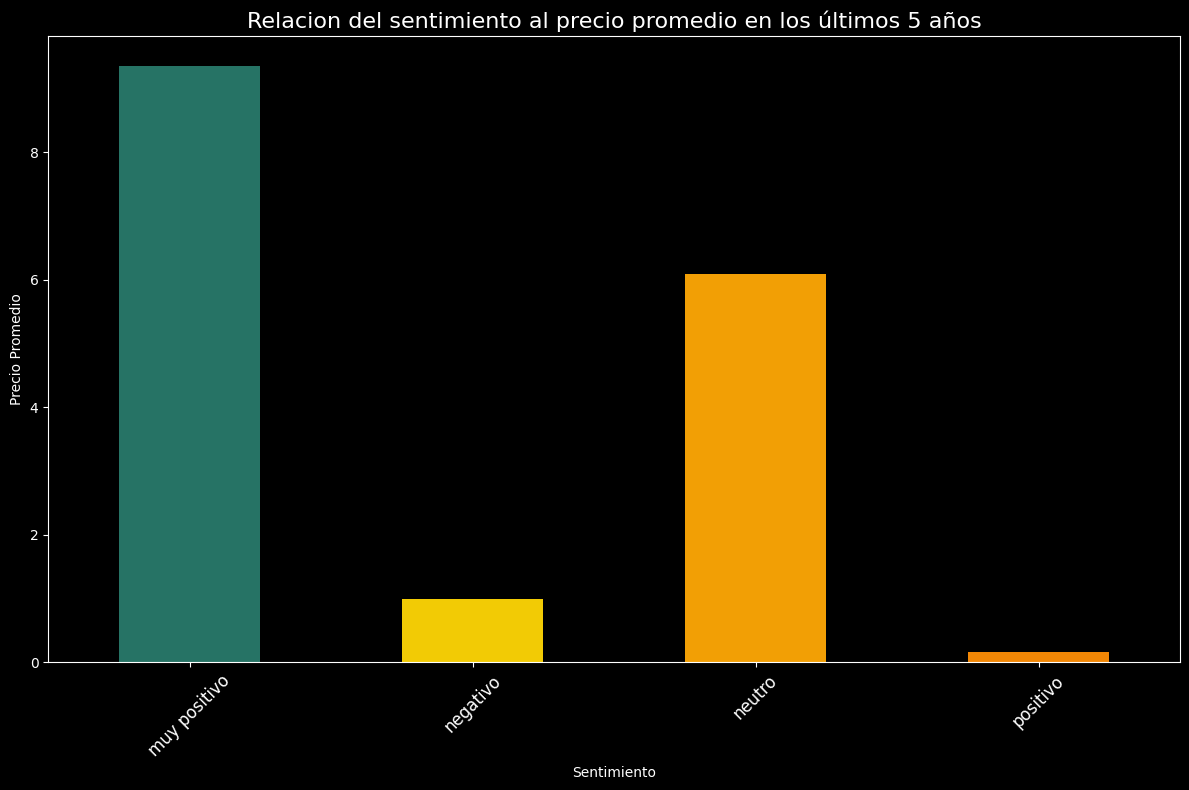

Relación del sentimiento al precio promedio en los últimos 5 años:

Sentimiento 'muy positivo': Precio promedio = $9.36
Sentimiento 'negativo': Precio promedio = $0.99
Sentimiento 'neutro': Precio promedio = $6.10
Sentimiento 'positivo': Precio promedio = $0.16


In [20]:
# Filtra los datos para incluir solo los últimos 5 años y eliminar valores nulos
ultimos_5_anios_sin_nulos = ultimos_5_anios.dropna(subset=['sentimiento'])

# Calcula el promedio de precio por sentimiento
promedio_precio_por_sentimiento = ultimos_5_anios_sin_nulos.groupby('sentimiento')['precio'].mean()

# Establece el estilo de fondo negro
plt.style.use('dark_background')

# Crea una figura con un eje
fig, ax = plt.subplots(figsize=(12, 8))

# Crea un gráfico de barras para mostrar cómo afecta el sentimiento al precio
promedio_precio_por_sentimiento.plot(kind='bar', color=colors, ax=ax)
ax.set_title('Relacion del sentimiento al precio promedio en los últimos 5 años', fontsize=16)
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Precio Promedio')
ax.tick_params(axis='x', rotation=45, labelsize=12)
plt.tight_layout()
plt.show()

# Calcula el promedio de precio por sentimiento
promedio_precio_por_sentimiento = ultimos_5_anios_sin_nulos.groupby('sentimiento')['precio'].mean()

# Imprime las estadísticas de relación entre sentimiento y precio promedio
print("Relación del sentimiento al precio promedio en los últimos 5 años:\n")
for sentimiento, precio_promedio in promedio_precio_por_sentimiento.items():
    print(f"Sentimiento '{sentimiento}': Precio promedio = ${precio_promedio:.2f}")


----------

Este análisis proporciona una visión general de los juegos de Steam en los últimos cinco años, destacando patrones de géneros, precios y sentimientos que podrían ser útiles para comprender las tendencias en la plataforma y tomar decisiones informadas.